<a href="https://colab.research.google.com/github/thunder1234x/Depp-Learning-Model-TENSORFLOW-2.X-/blob/main/Model_02_Electricity_production_TF2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files 
uploaded = files.upload()

Saving Electricity_production.csv to Electricity_production.csv


In [5]:
df=pd.read_csv('Electricity_production.csv')

In [6]:
df.head()  #target is Electricity_produce per hour

,Temparature,Vaccume,Pressure,Humidity,Electricity_produce
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [38]:
df.shape

(9568, 5)

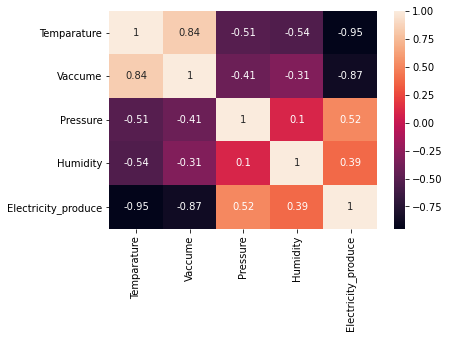

In [9]:
sns.heatmap(df.corr() , annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


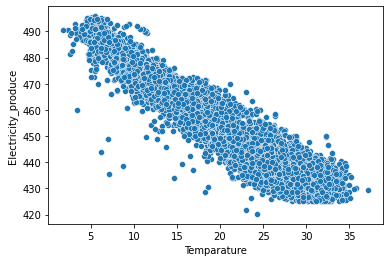

In [10]:
sns.scatterplot(df.Temparature , df.Electricity_produce)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


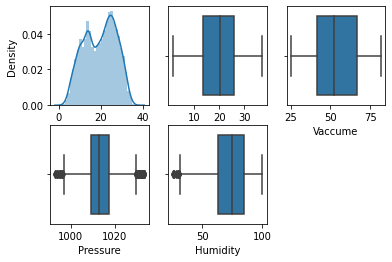

In [23]:
plt.subplot(2,3,1)
sns.distplot(df.Temparature)
plt.subplot(2,3,2)
sns.boxplot(x=df.Temparature)
plt.subplot(2,3,3)
sns.boxplot(x=df.Vaccume)
plt.subplot(2,3,4)
sns.boxplot(x=df.Pressure)
plt.subplot(2,3,5)
sns.boxplot(x=df.Humidity)

plt.show()

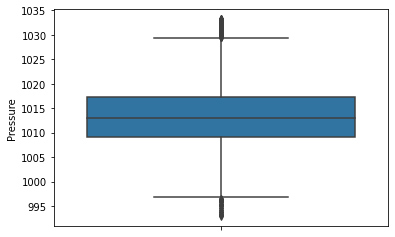

In [20]:
sns.boxplot(y=df['Pressure'])

In [30]:
df2=df[df.Pressure<1030]
df2=df[df.Pressure>999]

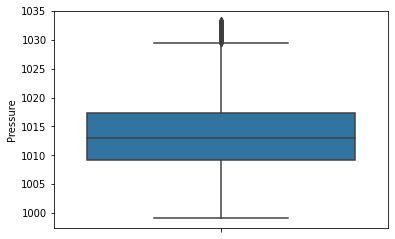

In [31]:
sns.boxplot(y=df2['Pressure'])

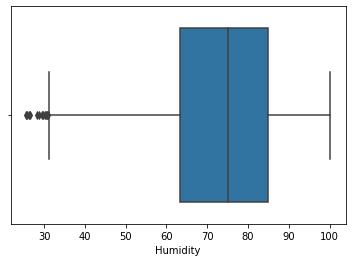

In [33]:
sns.boxplot(x=df.Humidity)

In [35]:
df3=df2[df2.Humidity>32]

In [37]:
df3.Humidity.describe()  , df3.shape

(count    9513.000000
 mean       73.349460
 std        14.481337
 min        32.190000
 25%        63.370000
 50%        74.980000
 75%        84.820000
 max       100.160000
 Name: Humidity, dtype: float64, (9513, 5))

In [39]:
X=df3.drop(columns=['Electricity_produce'])
y=df3.Electricity_produce

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [43]:
ann=tf.keras.Sequential()

In [47]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [48]:
ann.add(tf.keras.layers.Dense(units=1))

In [49]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [51]:
ann.fit(X_train,y_train ,  epochs=100)

Epoch 1/100
238/238 [==============================] - 0s 1ms/step - loss: 194063.0938
Epoch 2/100
238/238 [==============================] - 0s 1ms/step - loss: 167562.1875
Epoch 3/100
238/238 [==============================] - 0s 1ms/step - loss: 129908.8203
Epoch 4/100
238/238 [==============================] - 0s 1ms/step - loss: 95935.3906
Epoch 5/100
238/238 [==============================] - 0s 998us/step - loss: 72072.2734
Epoch 6/100
238/238 [==============================] - 0s 1ms/step - loss: 52712.1289
Epoch 7/100
238/238 [==============================] - 0s 1ms/step - loss: 34708.5234
Epoch 8/100
238/238 [==============================] - 0s 1ms/step - loss: 19817.1484
Epoch 9/100
238/238 [==============================] - 0s 1ms/step - loss: 10252.2520
Epoch 10/100
238/238 [==============================] - 0s 1ms/step - loss: 5849.8237
Epoch 11/100
238/238 [==============================] - 0s 986us/step - loss: 4067.9019
Epoch 12/100
238/238 [=========================

In [52]:
ann.evaluate(X_test,y_test)

60/60 [==============================] - 0s 743us/step - loss: 20.6486


20.64861488342285

In [55]:
y_pred=ann.predict(X_test).ravel()

In [68]:
y_pred[0:10], y_test[0:10] , y_test.std()

(array([431.8567 , 473.96024, 463.3651 , 468.48923, 437.13953, 465.11124,
        450.5373 , 481.06348, 479.8636 , 477.5033 ], dtype=float32),
 2949    434.01
 9192    478.79
 2395    462.69
 6019    472.22
 8901    435.17
 8712    462.81
 4966    446.18
 2010    489.95
 2864    471.43
 5296    472.16
 Name: Electricity_produce, dtype: float64,
 17.181343686830115)

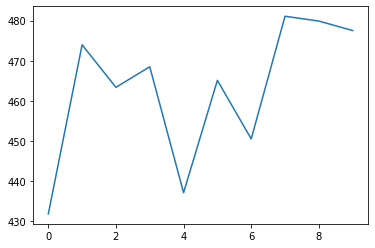

In [62]:
plt.plot(y_pred[0:10])

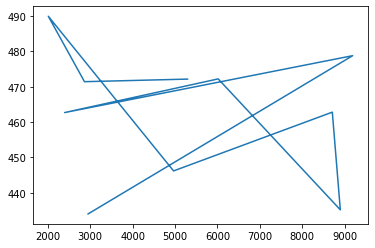

In [63]:
plt.plot(y_test[0:10])